# Programming Assignment - 6
---
## Name:
---

In [1]:
# Import required packages

from __future__ import print_function
from __future__ import division 

import pandas as pd
import numpy as np
#from scipy.sparse.linalg import svds as sparse_svd
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


## Question 1
---
(An open ended asignment) Visit the University of California open source [data repository](https://archive.ics.uci.edu/ml/datasets.php). Pick up an appropriate dataset of you choice preferably one with default-task 'classification'. Follow the example provided during the class to get some insight from the data that you have selected.  In the process of doing so utilize any tools and techniques at your disposal including (and not limited to)...

>- Observation of covariance and correlation between different features (columns, explanatory variables).

>- Distribution of different features and observations.

>- Utilize PCA to describe low-dimension representations.

>- Use plots such as Scree-plot, Bi-plot etc.

>- Discuss and clustering behaviours around the classes exposed by the first few PCs.

>- Anything else that you find interesting.

In [2]:
# Your code comes here

#url = "https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29"
col_names = ['name','mcg','gvh','lip','chg','aac','alm1','alm2','cp'] # Short Names
df_pima = pd.read_fwf("ecoli.data",names=col_names,sep=',')
df=pd.read_fwf("ecoli.data",names=col_names,sep=',')
del df_pima['name']
del df['name']
del df_pima['cp']

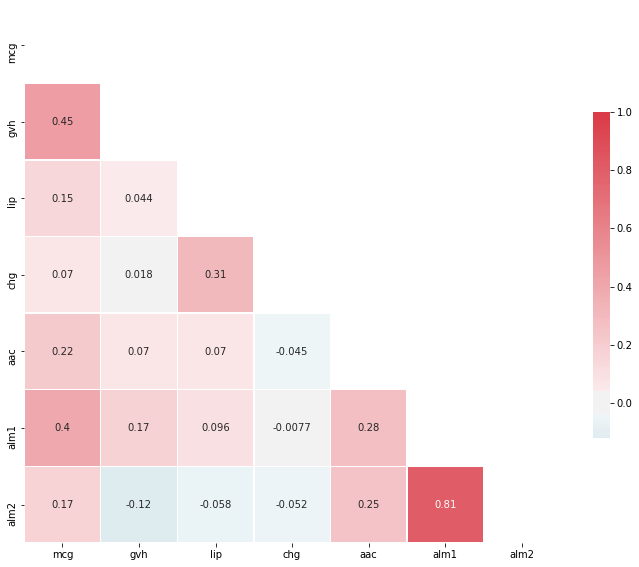

In [3]:
#Observation of covariance and correlation between different features (columns, explanatory variables)
pima_corr =df_pima.corr()
corr =pima_corr.values

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(pima_corr, mask=mask, cmap=cmap, vmax=1.0,annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The size of data set is: 336
Covariance matrix: 
:
[[ 0.04  0.01  0.    0.    0.01  0.02  0.01]
 [ 0.01  0.02  0.    0.    0.    0.01 -0.  ]
 [ 0.    0.    0.01  0.    0.    0.   -0.  ]
 [ 0.    0.    0.    0.   -0.   -0.   -0.  ]
 [ 0.01  0.    0.   -0.    0.01  0.01  0.01]
 [ 0.02  0.01  0.   -0.    0.01  0.05  0.04]
 [ 0.01 -0.   -0.   -0.    0.01  0.04  0.04]]


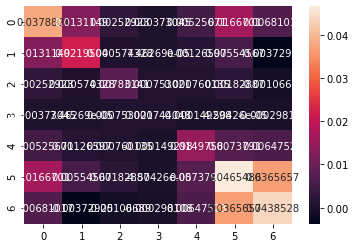

In [4]:
data_mat = df_pima.values
X = data_mat[:,0:6]
Y = data_mat[:,6]
np.set_printoptions(precision=2, suppress=True)
sigmaX = np.std(data_mat,axis=0)
# X = X/sigmaX # If Correlation PCA is required
muX = np.mean(data_mat, axis=0)
m = data_mat.shape[0]
print("The size of data set is:", m)
S = np.dot((data_mat - muX).T, (data_mat - muX)) / (m-1)
print('Covariance matrix: \n:')
print(S)
sns.heatmap(S,annot=True,fmt='g')

C:\Users\Soorya Suresh\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Soorya Suresh\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Soorya Suresh\Anaconda\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Soorya Suresh\Anaconda\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Soorya Suresh\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Soorya Suresh\Anaconda\lib\site-packages\seabo

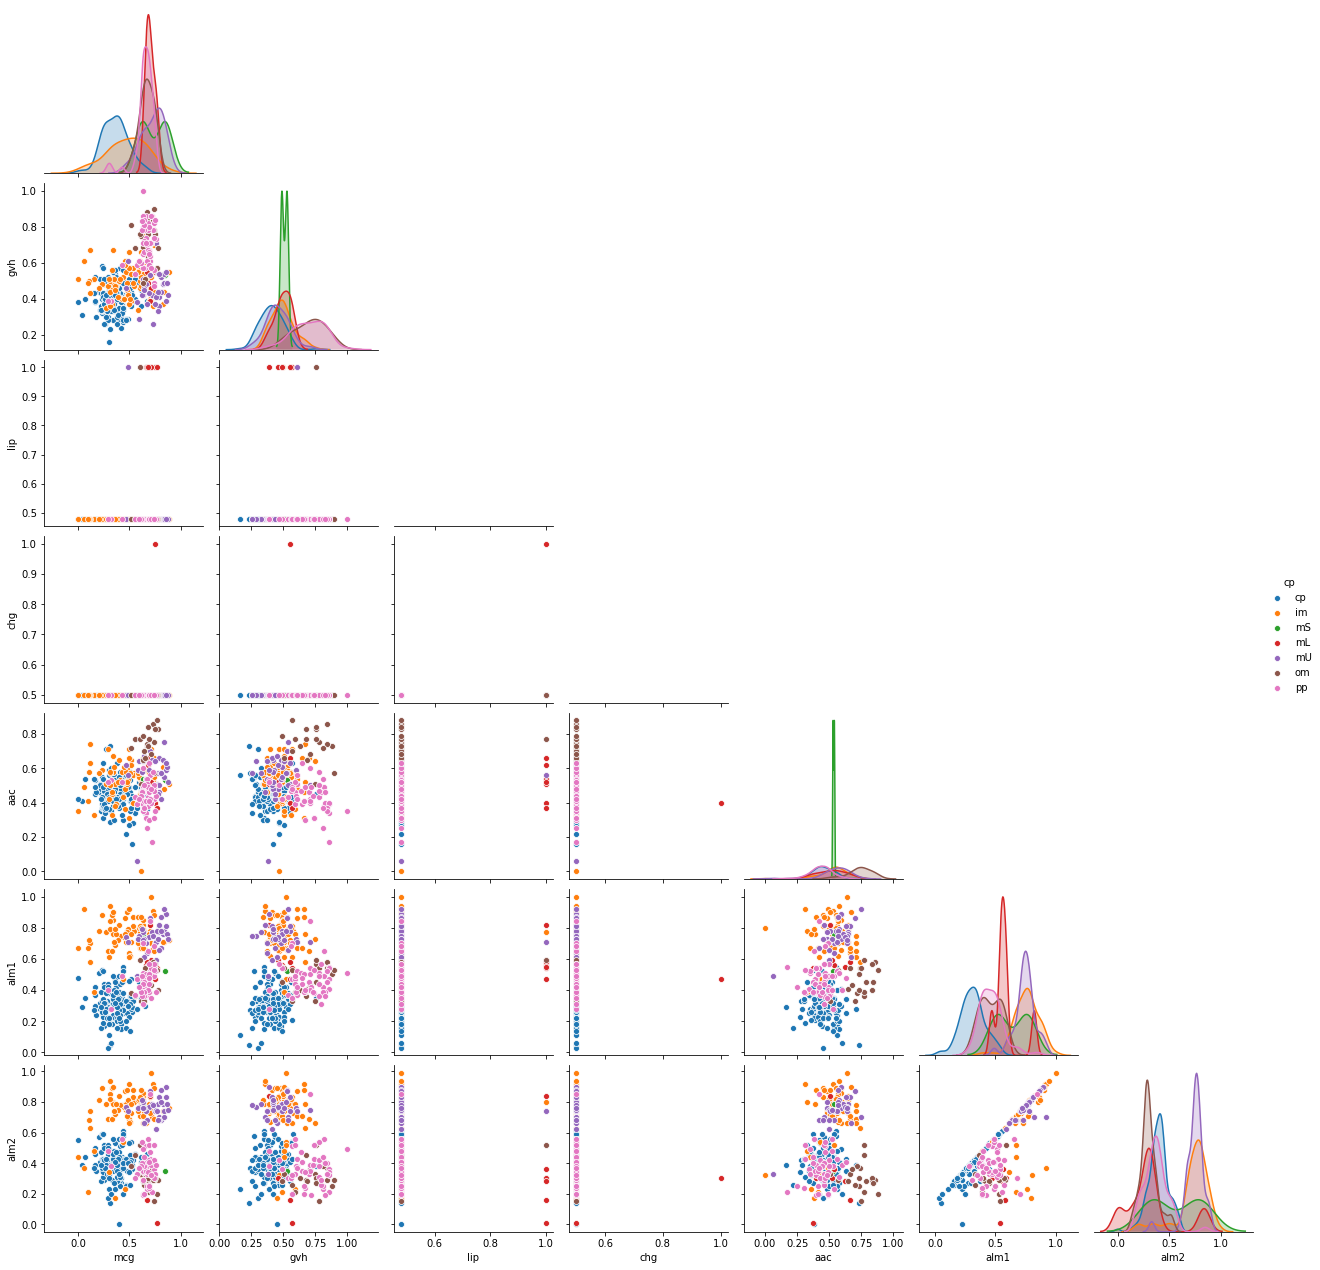

In [5]:
#Distribution of different features and observations
sns.pairplot(df,hue="cp",height=2.5,corner=True,x_vars=['mcg','gvh','lip','chg','aac','alm1','alm2'],y_vars=['mcg','gvh','lip','chg','aac','alm1','alm2'])

In [6]:
#Utilize PCA to describe low-dimension representations.
X_i = StandardScaler().fit_transform(df_pima)
pca_i = PCA(n_components=7)
pc_i = pca_i.fit_transform(X_i)


print("PCA components: %s")
print(pca_i.components_)
print("Explained Variance %")
print(pca_i.explained_variance_)
print ("Explained Variance Ratio")
print (pca_i.explained_variance_ratio_)

PCA components: %s
[[ 0.43  0.22  0.11  0.02  0.35  0.61  0.51]
 [ 0.37  0.47  0.48  0.46 -0.05 -0.16 -0.41]
 [-0.29 -0.55  0.49  0.55 -0.01  0.11  0.24]
 [ 0.07  0.15 -0.2   0.21 -0.88  0.24  0.22]
 [-0.    0.05 -0.67  0.67  0.29 -0.09  0.01]
 [-0.76  0.6   0.11  0.04  0.1   0.17  0.09]
 [-0.08 -0.19 -0.1   0.01  0.01  0.7  -0.67]]
Explained Variance %
[2.21 1.47 1.21 0.86 0.67 0.48 0.13]
Explained Variance Ratio
[0.32 0.21 0.17 0.12 0.1  0.07 0.02]


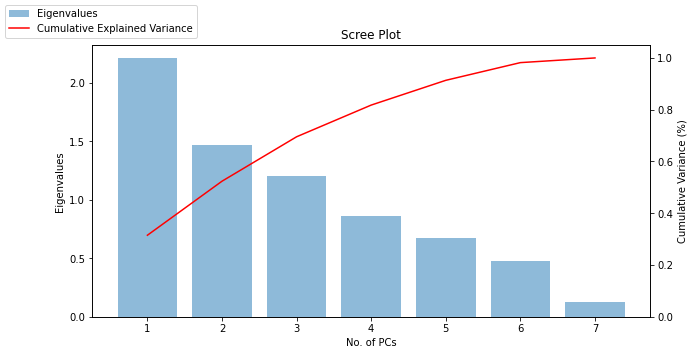

In [7]:
#Use plots such as Scree-plot, Bi-plot etc

fig,ax1=plt.subplots(figsize=(10,5))
ax2=ax1.twinx()
ax1.bar(range(1,len(pca_i.explained_variance_)+1),pca_i.explained_variance_,alpha=0.5,label="Eigenvalues")
ax1.set_ylabel('Eigenvalues')
ax1.set_xlabel('No. of PCs')
ax2.plot(range(1,len(pca_i.explained_variance_ )+1),np.cumsum(pca_i.explained_variance_ratio_),c='red',label="Cumulative Explained Variance")
ax2.set_ylabel("Cumulative Variance (%)")
ax2.set_ylim([0,1.05])
fig.legend(loc='upper left')
plt.title('Scree Plot')
plt.show()



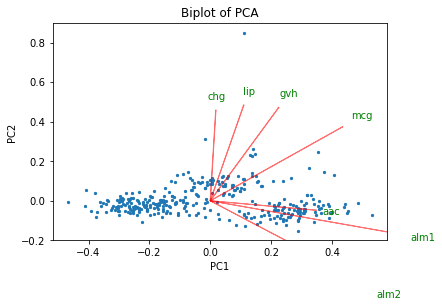

<Figure size 432x288 with 0 Axes>

In [14]:
def biplot(score,coef,labels=None):
 
    xs = score[:,0]
    ys = score[:,1]
    n = coef.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
 
    for i in range(n):
        plt.arrow(0, 0, coef[i,0],coef[i,1],color = 'r',alpha = 0.5)
        plt.text(coef[i,0]* 1.15,coef[i,1] * 1.15,labels[i],color = 'g',ha = 'center',va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))    
 
 
    plt.figure()


scaler = StandardScaler()
  
scaler.fit(df_pima)
 
ecoli_scaled = scaler.transform(df_pima)
pca = PCA(n_components=6)
PC = pca.fit_transform(ecoli_scaled)

plt.title('Biplot of PCA')
 
biplot(PC,np.transpose(pca.components_), list(['mcg','gvh','lip','chg','aac','alm1','alm2']))

#Discuss and clustering behaviours around the classes exposed by the first few PCs

The Bi-plot captures the clustering behaviors between the first 2 PC's. It shows us the grouping of data points outliers, correlation between varibles and even variable importance. In this dataset, there are a list of variables/attributes for each sequence name. From the bi-plot there are some outliers while also some grouped up data points. ALM1 and AAC are relatively close together and move in almost similar directions so they are positively correlated, however, ALMS2 and CHG are far away and pointing in almost opposite directions meaning they must be negatively correlated. The length of the arrows respresent the importance of each variable. In this case, AAC has the shortest length while ALM2 has the longest - meaning AAC is not as important variable as ALM2. There are some other patterns I noticed, such as how CHG, LIP and GVH are almost evenly spaced out and pointing in the same direction, meaning they must also be positively correlated. Also, notice how the bi-plot shows a horizontal distribution. This could mean that the most variation occurs at PC1 while PC2 explains a less variation. 

I include a couple more graphs to get better understanding of the dataset.

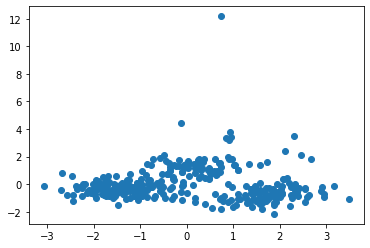

In [15]:
#extra graphs
plt.scatter(PC[:, 0], PC[:, 1])#notice how the PC's are horizontally distributed. This shows that the main 

(array([[  0.,   3.,  38.,  75.,  51.,  48.,  48.,  57.,  14.,   2.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   3.,  46., 147.,  66.,  45.,  21.,   1.,   5.,   1.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.],
        [  0.,   0.,  17.,  40.,  64., 169.,  36.,   4.,   4.,   1.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.],
        [  0.,   3.,  11.,  31.,  91., 142.,  46.,   7.,   3.,   2.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  8.,   1.,   0.,   2.,  67., 243.,  14.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,  31., 116., 144.,  38.,   5.,   2.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([-4.22, -3.4 , -2.58, -1.76, -0.94, -0.12,  0.7 ,  1.52,  2.34,
         3.16,  3.98,  4.8 ,  5.62,  6.44,  7.26,  8.08,  8.9 ,  9.72,
        10.54, 11.36, 

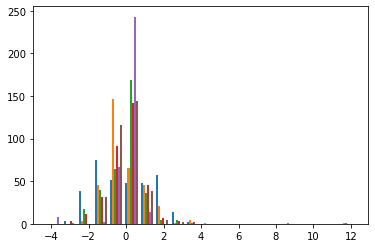

In [17]:
plt.hist(PC,bins=20)